In [1]:
%matplotlib inline

In [115]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import re
import seaborn as sns

## Data Import

In [3]:
listings = pd.read_csv("original_data_listings.csv")

/var/folders/y3/n8lqxtc5083d11375v3_wb740000gn/T/ipykernel_17121/3757460712.py:1: DtypeWarning: Columns (94) have mixed types. Specify dtype option on import or set low_memory=False.
  listings = pd.read_csv("original_data_listings.csv")


## Data Understanding

In [4]:
# Displaying all columns with the length of the df
pd.set_option('display.max_columns', len(listings.columns))
listings.head()

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,notes,transit,access,interaction,house_rules,thumbnail_url,medium_url,picture_url,xl_picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,street,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,city,state,zipcode,market,smart_location,country_code,country,latitude,longitude,is_location_exact,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,amenities,square_feet,price,weekly_price,monthly_price,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,number_of_reviews_ltm,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,is_business_travel_ready,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,15420,https://www.airbnb.com/rooms/15420,20190625184115,2019-06-25,Georgian Boutique Apt City Centre,"Stunning, impeccably refurbished spacious grou...",This is a huge and luxurious apartment for 2 -...,"Stunning, impeccably refurbished spacious grou...",none,"The neighbourhood is in the historic New Town,...",Please note that because of my interest in int...,It is easy to walk to many of the main tourist...,Guests have full access at the apartment. All...,Guests will be sent full details of what is su...,The apartment is strictly non-smoking and we r...,NaN,NaN,https://a0.muscache.com/im/pictures/cf69631f-4...,NaN,60423,https://www.airbnb.com/users/show/60423,Charlotte,2009-12-06,"Edinburgh, Scotland, United Kingdom","I have a background in property, having worked...",within a few hours,100%,NaN,t,https://a0.muscache.com/im/users/60423/profile...,https://a0.muscache.com/im/users/60423/profile...,NaN,3.0,3.0,"['email', 'phone', 'manual_online', 'reviews',...",t,t,"Edinburgh, City of Edinburgh, United Kingdom",New Town,"Old Town, Princes Street and Leith Street",NaN,Edinburgh,City of Edinburgh,EH1 3LD,Edinburgh,"Edinburgh, United Kingdom",GB,United Kingdom,55.95689,-3.18768,f,Apartment,Entire home/apt,2,1.0,1.0,1.0,Real Bed,"{TV,Internet,Wifi,""Wheelchair accessible"",Kitc...",861.0,$80.00,NaN,NaN,$200.00,$40.00,1,$0.00,3,30,1,3,30,30,2.9,30.0,today,t,6,12,22,193,2019-06-25,283,60,2011-01-18,2019-06-23,99.0,10.0,10.0,10.0,10.0,10.0,10.0,f,NaN,NaN,f,f,strict_14_with_grace_period,f,f,1,1,0,0,2.76
1,24288,https://www.airbnb.com/rooms/24288,20190625184115,2019-06-25,"Cool central Loft, sleeps 4, 2 double bed+en-s...",Boho rustic-chic former warehouse Loft located...,"Two bedroom, very central Loft apartment with ...",Boho rustic-chic former warehouse Loft located...,none,It's all in the mix: Culture-museums and galle...,The apartment is in the City centre so being a...,Walk to key central attractions or catch a bus...,The whole flat on the first floor and utility ...,Will meet guests on arrival and at check-out i...,Non smokers only and no smoking in the buildin...,NaN,NaN,https://a0.muscache.com/im/pictures/3460007/88...,NaN,46498,https://www.airbnb.com/users/show/46498,Gordon,2009-10-17,"Edinburgh, Scotland, United Kingdom",

In [5]:
# Checking number of different countries, since it is only UK, we can drop the country and leave the country_code
listings['country'].unique()

array(['United Kingdom'], dtype=object)

In [6]:
# Checking reivew_scores_accuracy
listings['review_scores_accuracy'].unique()

array([10.,  9.,  8., nan,  4.,  7.,  6.,  2.,  5.])

In [7]:
# Checking reivew_scores_accuracy
listings['review_scores_cleanliness'].unique()

array([10.,  9.,  8.,  6., nan,  4.,  7.,  5.,  2.])

In [8]:
# To list to check all 106 columns
listings.columns.to_list()

['id',
 'listing_url',
 'scrape_id',
 'last_scraped',
 'name',
 'summary',
 'space',
 'description',
 'experiences_offered',
 'neighborhood_overview',
 'notes',
 'transit',
 'access',
 'interaction',
 'house_rules',
 'thumbnail_url',
 'medium_url',
 'picture_url',
 'xl_picture_url',
 'host_id',
 'host_url',
 'host_name',
 'host_since',
 'host_location',
 'host_about',
 'host_response_time',
 'host_response_rate',
 'host_acceptance_rate',
 'host_is_superhost',
 'host_thumbnail_url',
 'host_picture_url',
 'host_neighbourhood',
 'host_listings_count',
 'host_total_listings_count',
 'host_verifications',
 'host_has_profile_pic',
 'host_identity_verified',
 'street',
 'neighbourhood',
 'neighbourhood_cleansed',
 'neighbourhood_group_cleansed',
 'city',
 'state',
 'zipcode',
 'market',
 'smart_location',
 'country_code',
 'country',
 'latitude',
 'longitude',
 'is_location_exact',
 'property_type',
 'room_type',
 'accommodates',
 'bathrooms',
 'bedrooms',
 'beds',
 'bed_type',
 'amenities',


In [9]:
listings.describe().T

,count,mean,std,min,25%,50%,75%,max
id,13245.0,2.007724e+07,9.844764e+06,1.542000e+04,1.327911e+07,2.017184e+07,2.739792e+07,3.606601e+07
scrape_id,13245.0,2.019063e+13,4.882997e+00,2.019063e+13,2.019063e+13,2.019063e+13,2.019063e+13,2.019063e+13
thumbnail_url,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
medium_url,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
xl_picture_url,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
host_id,13245.0,7.895519e+07,7.367464e+07,3.307800e+04,1.915174e+07,5.140714e+07,1.291968e+08,2.711014e+08
host_acceptance_rate,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
host_listings_count,13226.0,7.857856e+00,4.121429e+01,0.000000e+00,1.000000e+00,1.000000e+00,3.000000e+00,1.067000e+03
host_total_listings_count,13226.0,7.857856e+00,4.121429e+01,0.000000e+00,1.000000e+00,1.000000e+00,3.000000e+00,1.067000e+03
neighbourhood_group_cleansed,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [10]:
listings.shape

(13245, 106)

In [11]:
listings.dtypes

id                                                int64
listing_url                                      object
scrape_id                                         int64
last_scraped                                     object
name                                             object
                                                 ...   
calculated_host_listings_count                    int64
calculated_host_listings_count_entire_homes       int64
calculated_host_listings_count_private_rooms      int64
calculated_host_listings_count_shared_rooms       int64
reviews_per_month                               float64
Length: 106, dtype: object

In [12]:
listings.isna().sum()
# NA values are a small number so dropping the rows with NA doesn't seem correct.


id                                                 0
listing_url                                        0
scrape_id                                          0
last_scraped                                       0
name                                               1
                                                ... 
calculated_host_listings_count                     0
calculated_host_listings_count_entire_homes        0
calculated_host_listings_count_private_rooms       0
calculated_host_listings_count_shared_rooms        0
reviews_per_month                               2032
Length: 106, dtype: int64

In [13]:
# ID column has unique values
listings['id'].duplicated().any()

False

In [14]:
listings['experiences_offered'].describe().T

count     13245
unique        1
top        none
freq      13245
Name: experiences_offered, dtype: object

In [15]:
listings = listings.drop(['listing_url', 'scrape_id', 'last_scraped', 'summary', 'space', 'description', 'neighborhood_overview',
               'notes', 'house_rules', 'thumbnail_url', 'medium_url', 'picture_url', 'access', 'interaction',
              'transit', 'house_rules', 'xl_picture_url', 'host_url', 'host_about', 'host_thumbnail_url', 
               'host_picture_url', 'host_verifications', 'host_has_profile_pic', 'host_identity_verified',
              'neighbourhood_cleansed', 'neighbourhood_group_cleansed', 'smart_location', 'country', 'latitude',
              'longitude', 'is_location_exact', 'amenities', 'calendar_updated', 'calendar_last_scraped', 
               'first_review', 'last_review', 'requires_license', 'license', 'jurisdiction_names', 'instant_bookable',
              'is_business_travel_ready', 'require_guest_profile_picture', 'require_guest_phone_verification',
              'calculated_host_listings_count', 'calculated_host_listings_count_entire_homes', 'calculated_host_listings_count_private_rooms',
              'calculated_host_listings_count_shared_rooms'], axis=1)

In [16]:
listings.dtypes

id                               int64
name                            object
experiences_offered             object
host_id                          int64
host_name                       object
host_since                      object
host_location                   object
host_response_time              object
host_response_rate              object
host_acceptance_rate           float64
host_is_superhost               object
host_neighbourhood              object
host_listings_count            float64
host_total_listings_count      float64
street                          object
neighbourhood                   object
city                            object
state                           object
zipcode                         object
market                          object
country_code                    object
property_type                   object
room_type                       object
accommodates                     int64
bathrooms                      float64
bedrooms                 

In [17]:
listings['experiences_offered'].unique()

array(['none'], dtype=object)

In [18]:
listings['host_acceptance_rate'].sum()

0.0

In [19]:
listings.head(5)

,id,name,experiences_offered,host_id,host_name,host_since,host_location,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_neighbourhood,host_listings_count,host_total_listings_count,street,neighbourhood,city,state,zipcode,market,country_code,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,square_feet,price,weekly_price,monthly_price,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,has_availability,availability_30,availability_60,availability_90,availability_365,number_of_reviews,number_of_reviews_ltm,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,cancellation_policy,reviews_per_month
0,15420,Georgian Boutique Apt City Centre,none,60423,Charlotte,2009-12-06,"Edinburgh, Scotland, United Kingdom",within a few hours,100%,NaN,t,NaN,3.0,3.0,"Edinburgh, City of Edinburgh, United Kingdom",New Town,Edinburgh,City of Edinburgh,EH1 3LD,Edinburgh,GB,Apartment,Entire home/apt,2,1.0,1.0,1.0,Real Bed,861.0,$80.00,NaN,NaN,$200.00,$40.00,1,$0.00,3,30,1,3,30,30,2.9,30.0,t,6,12,22,193,283,60,99.0,10.0,10.0,10.0,10.0,10.0,10.0,strict_14_with_grace_period,2.76
1,24288,"Cool central Loft, sleeps 4, 2 double bed+en-s...",none,46498,Gordon,2009-10-17,"Edinburgh, Scotland, United Kingdom",within an hour,100%,NaN,t,Southside,1.0,1.0,"Edinburgh, EH8 9JW, United Kingdom",Southside,Edinburgh,EH8 9JW,Scotland,Edinburgh,GB,Loft,Entire home/apt,4,1.5,2.0,2.0,Real Bed,NaN,$115.00,NaN,NaN,$250.00,$30.00,4,$25.00,2,365,2,2,365,365,2.0,365.0,t,1,3,4,4,199,45,92.0,10.0,9.0,10.0,10.0,10.0,9.0,flexible,1.86
2,38628,Edinburgh Holiday Let,none,165635,Trish,2010-07-13,"Edinburgh, Scotland, United Kingdom",within an hour,100%,NaN,f,NaN,2.0,2.0,"Edinburgh, City of Edinburgh, United Kingdom",NaN,Edinburgh,City of Edinburgh,EH15 2,Edinburgh,GB,Apartment,Entire home/apt,2,1.0,0.0,2.0,Real Bed,NaN,$46.00,$280.00,$800.00,$100.00,NaN,2,$10.00,4,60,4,6,60,60,4.2,60.0,t,9,29,31,288,52,18,94.0,10.0,9.0,10.0,10.0,10.0,10.0,strict_14_with_grace_period,0.85
3,44552,Double room - spacious Leith flat,none,195950,Shaun,2010-08-09,"Edinburgh, Scotland, United Kingdom",within a few hours,100%,NaN,t,NaN,1.0,1.0,"Edinburgh, City of Edinburgh, United Kingdom",Leith,Edinburgh,City of Edinburgh,EH6 8,Edinburgh,GB,Condominium,Private room,2,1.0,1.0,1.0,Real Bed,NaN,$32.00,$230.00,$700.00,$0.00,$10.00,2,$0.00,2,21,2,2,21,21,2.0,21.0,t,18,25,45,136,184,29,93.0,10.0,10.0,10.0,10.0,9.0,10.0,strict_14_with_grace_period,1.71
4,47616,"City flat, close to nature and the Fringe",none,216203,Ben,2010-08-29,"Edinburgh, Scotland, United Kingdom",within an hour,100%,NaN,f,Southside,1.0,1.0,"Edinburgh, City of Edinburgh, United Kingdom",Southside,Edinburgh,City of Edinburgh,EH8 9,Edinburgh,GB,Condominium,Private room,2,1.0,1.0,1.0,Real Bed,NaN,$100.00,NaN,NaN,$75.00,$10.00,2,$0.00,1,31,1,1,31,31,1.0,31.0,t,0,0,0,0,32,9,98.0,10.0,10.0,10.0,10.0,10.0,10.0,moderate,0.84


## Data Cleaning

In [20]:
listings = listings.drop(['experiences_offered', 'host_name', 'host_acceptance_rate', 'has_availability',
                          'cancellation_policy', 'street', 'country_code'], axis=1)

In [21]:
listings.shape

(13245, 53)

In [22]:
listings.head(50)

,id,name,host_id,host_since,host_location,host_response_time,host_response_rate,host_is_superhost,host_neighbourhood,host_listings_count,host_total_listings_count,neighbourhood,city,state,zipcode,market,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,square_feet,price,weekly_price,monthly_price,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,availability_30,availability_60,availability_90,availability_365,number_of_reviews,number_of_reviews_ltm,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,reviews_per_month
0,15420,Georgian Boutique Apt City Centre,60423,2009-12-06,"Edinburgh, Scotland, United Kingdom",within a few hours,100%,t,NaN,3.0,3.0,New Town,Edinburgh,City of Edinburgh,EH1 3LD,Edinburgh,Apartment,Entire home/apt,2,1.0,1.0,1.0,Real Bed,861.0,$80.00,NaN,NaN,$200.00,$40.00,1,$0.00,3,30,1,3,30,30,2.9,30.0,6,12,22,193,283,60,99.0,10.0,10.0,10.0,10.0,10.0,10.0,2.76
1,24288,"Cool central Loft, sleeps 4, 2 double bed+en-s...",46498,2009-10-17,"Edinburgh, Scotland, United Kingdom",within an hour,100%,t,Southside,1.0,1.0,Southside,Edinburgh,EH8 9JW,Scotland,Edinburgh,Loft,Entire home/apt,4,1.5,2.0,2.0,Real Bed,NaN,$115.00,NaN,NaN,$250.00,$30.00,4,$25.00,2,365,2,2,365,365,2.0,365.0,1,3,4,4,199,45,92.0,10.0,9.0,10.0,10.0,10.0,9.0,1.86
2,38628,Edinburgh Holiday Let,165635,2010-07-13,"Edinburgh, Scotland, United Kingdom",within an hour,100%,f,NaN,2.0,2.0,NaN,Edinburgh,City of Edinburgh,EH15 2,Edinburgh,Apartment,Entire home/apt,2,1.0,0.0,2.0,Real Bed,NaN,$46.00,$280.00,$800.00,$100.00,NaN,2,$10.00,4,60,4,6,60,60,4.2,60.0,9,29,31,288,52,18,94.0,10.0,9.0,10.0,10.0,10.0,10.0,0.85
3,44552,Double room - spacious Leith flat,195950,2010-08-09,"Edinburgh, Scotland, United Kingdom",within a few hours,100%,t,NaN,1.0,1.0,Leith,Edinburgh,City of Edinburgh,EH6 8,Edinburgh,Condominium,Private room,2,1.0,1.0,1.0,Real Bed,NaN,$32.00,$230.00,$700.00,$0.00,$10.00,2,$0.00,2,21,2,2,21,21,2.0,21.0,18,25,45,136,184,29,93.0,10.0,10.0,10.0,10.0,9.0,10.0,1.71
4,47616,"City flat, close to nature and the Fringe",216203,2010-08-29,"Edinburgh, Scotland, United Kingdom",within an hour,100%,f,Southside,1.0,1.0,Southside,Edinburgh,City of Edinburgh,EH8 9,Edinburgh,Condominium,Private room,2,1.0,1.0,1.0,Real Bed,NaN,$100.00,NaN,NaN,$75.00,$10.00,2,$0.00,1,31,1,1,31,31,1.0,31.0,0,0,0,0,32,9,98.0,10.0,10.0,10.0,10.0,10.0,10.0,0.84
5,48645,Large Sunny Room on Royal Mile,221474,2010-09-02,"Edinburgh, Scotland, United Kingdom",within an hour,100%,t,Old Town,2.0,2.0,Old Town,Edinburgh,Scotland,NaN,Edinburgh,Apartment,Private room,3,1.0,1.0,2.0,Real Bed,NaN,$71.00,NaN,NaN,$0.00,$8.00,2,$10.00,1,31,1,1,31,31,1.0,31.0,6,7,19,128,762,131,97.0,10.0,10.0,10.0,10.0,10.0,10.0,7.44
6,51505,Superb City Centre Apartment,236828,2010-09-16,"Edinburgh, Scotland, United Kingdom",within an hour,100%,f,New Town,9.0,9.0,New Town,Edinburgh,City of Edinburgh,EH2 1,Edinburgh,Apartment,Entire home/apt,5,1.0,2.0,3.0,Real Bed,700.0,$175.00,NaN,NaN,NaN,NaN,4,$10.00,3,30,3,3,30,30,3.0,30.0,0,0,0,0,7,1,100.0,10.0,10.0,10.0,10.0,10.0,10.0,0.07
7,54188,The Four Sisters Boatel,253850,2010-10-05,"Edinburgh, Scotland, United Kingdom",within a day,67%,f,West End,1.0,1.0,West End,Edinburgh,NaN,EH3 9NY,Edinburgh,Boat,Entire home/apt,5,1.0,3.0,4.0,Real Bed,NaN,$150.00,"$1,050.00","$3,500.00",$200.00,$0.00,4,$10.00,2,365,2,4,365,365,2.1,365.0,14,28,51,260,28,2,92.0,9.0,9.0,9.0,9.0,10.0,9.0,0.34
8,55881,Lovely central apartment sleeps 6,264345,2010-10-17,"London, England, United Kingdom",within an hour,100%,t,Bethnal Green,2.0,2.0,Leith,Edinburgh,City of Edinburgh,EH7 5HZ,Edinburgh,Apartment,Entire home/apt,6,1.0,4.0,5.0,Real Bed,NaN,$139.00,NaN,NaN,$150.00,$45.00,1,$0.00,2,365,2,4,365,365,2.2,365

In [23]:
# Let's see the total number of Nan values and how we can deal with them.
# It seems that some columns have a lot of Nan values and we can drop them
listings.isna().sum()

id                                 0
name                               1
host_id                            0
host_since                        19
host_location                     56
host_response_time              3389
host_response_rate              3389
host_is_superhost                 19
host_neighbourhood              5687
host_listings_count               19
host_total_listings_count         19
neighbourhood                   2294
city                              16
state                           2550
zipcode                          213
market                           205
property_type                      0
room_type                          0
accommodates                       0
bathrooms                         12
bedrooms                           4
beds                              15
bed_type                           0
square_feet                    13220
price                              0
weekly_price                   12069
monthly_price                  12457
s

In [24]:
listings['square_feet'].unique()

array([ 861.,   nan,  700., 1200.,  743., 1350.,  800.,  592.,  484.,
        500.,  635.,  969.,  915.,  624.,  112., 1345.,    0., 1630.,
        150., 1313.,  753.,  538.])

In [25]:
listings = listings.drop(['square_feet', 'host_neighbourhood', 'weekly_price', 'monthly_price'], axis=1)

In [26]:
state_counts = listings['state'].value_counts()
market_counts = listings['market'].value_counts()
intersect = set(state_counts.index).intersection(set(market_counts.index))
jaccard_index = len(intersect) / len(set(state_counts.index).union(set(market_counts.index)))

In [27]:
# It seems that the jaccard index shows us that the the columns are not very similar, so I won't drop one over the other
jaccard_index

0.01818181818181818

In [28]:
# Since about 75% of the data in column "state" is "Scotland" missing values will
# be assigned a valued of "Scotland"
listings['state'].value_counts()

Scotland                           9955
City of Edinburgh                   217
Edinburgh                           191
Midlothian                          178
Lothian                              45
.                                    12
Mid Lothian                          10
*                                     9
Edinburgh & Lothians                  7
East Lothian                          5
Edinburgh City                        5
Lothians                              5
Midlothian, Scotland                  4
UK                                    3
Leith                                 3
midlothian                            2
east lothian                          2
                                      2
lothian                               2
City of Edinburgh - City Centre       2
United Kingdom                        2
U.K.                                  2
Lothain                               2
West Lothian                          2
Midlothian/Edinburghshire             1


In [29]:
listings['state'].fillna('Scotland', inplace=True)

In [30]:
listings.head(5)

,id,name,host_id,host_since,host_location,host_response_time,host_response_rate,host_is_superhost,host_listings_count,host_total_listings_count,neighbourhood,city,state,zipcode,market,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,price,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,availability_30,availability_60,availability_90,availability_365,number_of_reviews,number_of_reviews_ltm,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,reviews_per_month
0,15420,Georgian Boutique Apt City Centre,60423,2009-12-06,"Edinburgh, Scotland, United Kingdom",within a few hours,100%,t,3.0,3.0,New Town,Edinburgh,City of Edinburgh,EH1 3LD,Edinburgh,Apartment,Entire home/apt,2,1.0,1.0,1.0,Real Bed,$80.00,$200.00,$40.00,1,$0.00,3,30,1,3,30,30,2.9,30.0,6,12,22,193,283,60,99.0,10.0,10.0,10.0,10.0,10.0,10.0,2.76
1,24288,"Cool central Loft, sleeps 4, 2 double bed+en-s...",46498,2009-10-17,"Edinburgh, Scotland, United Kingdom",within an hour,100%,t,1.0,1.0,Southside,Edinburgh,EH8 9JW,Scotland,Edinburgh,Loft,Entire home/apt,4,1.5,2.0,2.0,Real Bed,$115.00,$250.00,$30.00,4,$25.00,2,365,2,2,365,365,2.0,365.0,1,3,4,4,199,45,92.0,10.0,9.0,10.0,10.0,10.0,9.0,1.86
2,38628,Edinburgh Holiday Let,165635,2010-07-13,"Edinburgh, Scotland, United Kingdom",within an hour,100%,f,2.0,2.0,NaN,Edinburgh,City of Edinburgh,EH15 2,Edinburgh,Apartment,Entire home/apt,2,1.0,0.0,2.0,Real Bed,$46.00,$100.00,NaN,2,$10.00,4,60,4,6,60,60,4.2,60.0,9,29,31,288,52,18,94.0,10.0,9.0,10.0,10.0,10.0,10.0,0.85
3,44552,Double room - spacious Leith flat,195950,2010-08-09,"Edinburgh, Scotland, United Kingdom",within a few hours,100%,t,1.0,1.0,Leith,Edinburgh,City of Edinburgh,EH6 8,Edinburgh,Condominium,Private room,2,1.0,1.0,1.0,Real Bed,$32.00,$0.00,$10.00,2,$0.00,2,21,2,2,21,21,2.0,21.0,18,25,45,136,184,29,93.0,10.0,10.0,10.0,10.0,9.0,10.0,1.71
4,47616,"City flat, close to nature and the Fringe",216203,2010-08-29,"Edinburgh, Scotland, United Kingdom",within an hour,100%,f,1.0,1.0,Southside,Edinburgh,City of Edinburgh,EH8 9,Edinburgh,Condominium,Private room,2,1.0,1.0,1.0,Real Bed,$100.00,$75.00,$10.00,2,$0.00,1,31,1,1,31,31,1.0,31.0,0,0,0,0,32,9,98.0,10.0,10.0,10.0,10.0,10.0,10.0,0.84


In [31]:
# The host response time has a lot of nan values. We can substitu those with the mean or in this context it might
# be more appropriate to add a value of "a week or more" since the nan is non of the previous values and maybe this is a host
# which hasn't responded at all since if we're being realistic if the host doesn't reply in a week he probably won't
# reply at all. So let's substitute the nan value with "no answer".
listings['host_response_time'].unique()

array(['within a few hours', 'within an hour', 'within a day', nan,
       'a few days or more'], dtype=object)

In [32]:
listings['host_response_time'].fillna('no answer', inplace=True)

In [33]:
listings['host_response_rate'].unique()

array(['100%', '67%', nan, '80%', '88%', '64%', '0%', '78%', '92%', '50%',
       '90%', '73%', '70%', '83%', '75%', '97%', '94%', '93%', '33%',
       '86%', '99%', '25%', '79%', '47%', '89%', '30%', '91%', '60%',
       '43%', '98%', '20%', '42%', '57%', '95%', '63%', '96%', '58%',
       '14%', '85%', '56%', '71%', '77%', '40%', '17%', '87%', '84%',
       '81%', '82%', '54%', '69%'], dtype=object)

In [34]:
listings['host_response_rate'] = listings['host_response_rate'].fillna(0)

In [35]:
listings['city'].fillna('Edinburgh', inplace=True)

In [36]:
listings['neighbourhood'].value_counts()

Leith          3134
Old Town       1283
New Town       1058
Haymarket      1026
West End        822
Marchmont       730
Stockbridge     587
Cannonmills     485
Southside       481
Newington       439
Morningside     346
Bruntsfield     290
Tollcross       270
Name: neighbourhood, dtype: int64

In [37]:
listings['neighbourhood'].fillna('unknown', inplace=True)

In [38]:
# There are non-numeric strings in the column. So we need to convert them to numeric values with regex
listings['security_deposit'] = pd.to_numeric(listings['security_deposit'].apply(lambda x: re.sub(r'[^\d.]+', '', str(x))), errors='coerce')

In [39]:
# Fill NaN values with mean
mean_security_deposit = listings['security_deposit'].mean()
listings['security_deposit'].fillna(mean_security_deposit, inplace=True)

In [40]:
listings['security_deposit']

0        200.000000
1        250.000000
2        100.000000
3          0.000000
4         75.000000
            ...    
13240      0.000000
13241    109.375912
13242    109.375912
13243      0.000000
13244    200.000000
Name: security_deposit, Length: 13245, dtype: float64

In [41]:
# We will perform the same action as to the security_deposit column since cleaning fees will be similar.
# There are non-numeric strings in the column. So we need to convert them to numeric values with regex
listings['cleaning_fee'] = pd.to_numeric(listings['cleaning_fee'].apply(lambda x: re.sub(r'[^\d.]+', '', str(x))), errors='coerce')

In [42]:
# Fill NaN values with mean
mean_cleaning_fee = listings['cleaning_fee'].mean()
listings['cleaning_fee'].fillna(mean_cleaning_fee, inplace=True)

In [43]:
# Let's look at a sample size of where there are NaN values in column "review_scores_rating" to determine if we drop the rows
listings[listings['review_scores_rating'].isna()].sample(20)

,id,name,host_id,host_since,host_location,host_response_time,host_response_rate,host_is_superhost,host_listings_count,host_total_listings_count,neighbourhood,city,state,zipcode,market,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,price,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,availability_30,availability_60,availability_90,availability_365,number_of_reviews,number_of_reviews_ltm,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,reviews_per_month
7976,23700583,PRINCESS STREET 7 MINUTES,177543153,2018-03-09,"Andalusia, Spain",no answer,0,f,1.0,1.0,Tollcross,Edinburgh,Scotland,EH3 9QJ,Edinburgh,Serviced apartment,Private room,2,1.0,1.0,1.0,Real Bed,$55.00,109.375912,29.559238,1,$0.00,4,6,4,4,6,6,4.0,6.0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
12348,34583906,Light Airy Detached Bungalow Edinburgh - Sleeps 8,260943213,2019-05-10,"Edinburgh, Scotland, United Kingdom",within an hour,100%,f,1.0,1.0,Morningside,Edinburgh,Scotland,EH10 5RL,Edinburgh,Bungalow,Entire home/apt,8,2.0,4.0,4.0,Real Bed,$200.00,109.375912,29.559238,1,$0.00,3,1125,3,3,1125,1125,3.0,1125.0,4,4,4,4,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
13167,35920492,Spacious central flat with free parking,40365616,2015-08-03,United Kingdom,within an hour,100%,f,5.0,5.0,Old Town,Edinburgh,Scotland,EH7 5XH,Edinburgh,Apartment,Entire home/apt,6,1.0,2.0,3.0,Real Bed,$50.00,0.000000,40.000000,1,$10.00,1,30,1,2,30,30,1.1,30.0,0,0,15,112,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1037,4346412,2-Bedrooms Flat Royal Mile (5),1641675,2012-01-23,"Edinburgh, Scotland, United Kingdom",within a few hours,90%,f,78.0,78.0,Old Town,Edinburgh,Scotland,EH1 1RD,Edinburgh,Apartment,Entire home/apt,4,1.0,2.0,3.0,Real Bed,$145.00,0.000000,0.000000,2,$0.00,2,1125,2,2,1125,1125,2.0,1125.0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
11414,32461948,Grand Suite/RO · Grand Suite/RO · Grand Suite/...,98650417,2016-10-07,"Edinburgh, Scotland, United Kingdom",within an hour,100%,f,7.0,7.0,West End,.,Edinburgh,EH37RY,Edinburgh,Boutique hotel,Private room,2,1.0,1.0,1.0,Real Bed,$200.00,109.375912,0.000000,2,$0.00,1,1125,1,3,1125,1125,1.0,1125.0,0,0,0,247,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
12681,35252036,"Rabble, a boutique hotel, restaurant and bar",265381874,2019-05-31,"Edinburgh, Scotland, United Kingdom",a few days or more,40%,f,2.0,2.0,New Town,Edinburgh,Scotland,EH2 1LH,Edinburgh,Boutique hotel,Private room,2,1.0,1.0,1.0,Real Bed,$200.00,109.375912,0.000000,2,$25.00,1,1125,1,1,1125,1125,1.0,1125.0,7,19,34,288,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5791,19313465,Double bedroom is available for short-term rent,102205664,2016-11-02,"Edinburgh, Scotland, United Kingdom",no answer,0,f,1.0,1.0,unknown,Edinburgh,Scotland,EH5 2GA,Edinburgh,Apartment,Private room,1,1.0,1.0,1.0,Real Bed,$25.00,109.375912,29.559238,1,$0.00,1,20,1,1,20,20,1.0,20.0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
12935,35612112,3 Double-Bedroom Flat with view of Arthur's Seat,247302457,2019-03-06,"Edinburgh, Scotland, United Kingdom",within an hour,100%,f,1.0,1.0,Marchmont,Edinburgh,Scotland,EH9 1ER,Edinburgh,Apartment,Entire home/apt,6,1.0,3.0,3.0,Real Bed,$135.00,109.375912,29.559238,1,$0.00,1,1125,1,1,1125,1125,1.0,1125.0,8,10,10,10,1,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0
12624,35179065,"3 Bedroom flat, over looking the Meadows.",95884529,2016-09-19,"Edinburgh, Scotland, United Kingdom",within a few hours,100%,f,1.0,1.0,Marchmont,Edinburgh,Scotland,EH9 1JY,Edinburgh,Apartment,Entire home/apt,6,1.0,3.0,3.0,Real Bed,$110.00,150.000000,50.000000,4,$15.00,2,10,2,2,10,10,2.0,10.0,22,39,47,47,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
13004,35704147,Super Central - Cosy living room - Sofa Bed,268567760,2019-06-14,GB,within an hour,100%,f,2.0,2.0

In [44]:
# This means that those id's don't have a review at all, so if we want to perform any actions on them we can drop the rows
# Group the data by "id" column
grouped = listings.groupby('id')

# Count the number of unique NaN values in "review_scores_rating" column for each group
null_counts = grouped['review_scores_rating'].apply(lambda x: x.isnull().nunique())

# Check if the count of unique NaN values is equal to the number of groups
if len(grouped) == (null_counts == 1).sum():
    print("All NaN values in 'review_scores_rating' are unique for each 'id'")
else:
    print("There are some 'id' values with non-unique NaN values in 'review_scores_rating'")


All NaN values in 'review_scores_rating' are unique for each 'id'


In [45]:
# Convert the host_since colunn to datetime to be more useful
listings['host_since'] = pd.to_datetime(listings['host_since'])

In [46]:
# Convert price column to float
listings['price'] = pd.to_numeric(listings['price'].apply(lambda x: re.sub(r'[^\d.]+', '', str(x))), errors='coerce')

In [47]:
# Convert extra_people column to float
listings['extra_people'] = pd.to_numeric(listings['extra_people'].apply(lambda x: re.sub(r'[^\d.]+', '', str(x))), errors='coerce')

In [48]:
listings['host_response_rate'] = pd.to_numeric(listings['host_response_rate'].str.replace('%', ''))

In [49]:
listings.dtypes

id                                      int64
name                                   object
host_id                                 int64
host_since                     datetime64[ns]
host_location                          object
host_response_time                     object
host_response_rate                    float64
host_is_superhost                      object
host_listings_count                   float64
host_total_listings_count             float64
neighbourhood                          object
city                                   object
state                                  object
zipcode                                object
market                                 object
property_type                          object
room_type                              object
accommodates                            int64
bathrooms                             float64
bedrooms                              float64
beds                                  float64
bed_type                          

In [53]:
listings.head(5)

,id,name,host_id,host_since,host_location,host_response_time,host_response_rate,host_is_superhost,host_listings_count,host_total_listings_count,neighbourhood,city,state,zipcode,market,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,price,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,availability_30,availability_60,availability_90,availability_365,number_of_reviews,number_of_reviews_ltm,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,reviews_per_month
0,15420,Georgian Boutique Apt City Centre,60423,2009-12-06,"Edinburgh, Scotland, United Kingdom",within a few hours,100.0,t,3.0,3.0,New Town,Edinburgh,City of Edinburgh,EH1 3LD,Edinburgh,Apartment,Entire home/apt,2,1.0,1.0,1.0,Real Bed,80.0,200.0,40.000000,1,0.0,3,30,1,3,30,30,2.9,30.0,6,12,22,193,283,60,99.0,10.0,10.0,10.0,10.0,10.0,10.0,2.76
1,24288,"Cool central Loft, sleeps 4, 2 double bed+en-s...",46498,2009-10-17,"Edinburgh, Scotland, United Kingdom",within an hour,100.0,t,1.0,1.0,Southside,Edinburgh,EH8 9JW,Scotland,Edinburgh,Loft,Entire home/apt,4,1.5,2.0,2.0,Real Bed,115.0,250.0,30.000000,4,25.0,2,365,2,2,365,365,2.0,365.0,1,3,4,4,199,45,92.0,10.0,9.0,10.0,10.0,10.0,9.0,1.86
2,38628,Edinburgh Holiday Let,165635,2010-07-13,"Edinburgh, Scotland, United Kingdom",within an hour,100.0,f,2.0,2.0,unknown,Edinburgh,City of Edinburgh,EH15 2,Edinburgh,Apartment,Entire home/apt,2,1.0,0.0,2.0,Real Bed,46.0,100.0,29.559238,2,10.0,4,60,4,6,60,60,4.2,60.0,9,29,31,288,52,18,94.0,10.0,9.0,10.0,10.0,10.0,10.0,0.85
3,44552,Double room - spacious Leith flat,195950,2010-08-09,"Edinburgh, Scotland, United Kingdom",within a few hours,100.0,t,1.0,1.0,Leith,Edinburgh,City of Edinburgh,EH6 8,Edinburgh,Condominium,Private room,2,1.0,1.0,1.0,Real Bed,32.0,0.0,10.000000,2,0.0,2,21,2,2,21,21,2.0,21.0,18,25,45,136,184,29,93.0,10.0,10.0,10.0,10.0,9.0,10.0,1.71
4,47616,"City flat, close to nature and the Fringe",216203,2010-08-29,"Edinburgh, Scotland, United Kingdom",within an hour,100.0,f,1.0,1.0,Southside,Edinburgh,City of Edinburgh,EH8 9,Edinburgh,Condominium,Private room,2,1.0,1.0,1.0,Real Bed,100.0,75.0,10.000000,2,0.0,1,31,1,1,31,31,1.0,31.0,0,0,0,0,32,9,98.0,10.0,10.0,10.0,10.0,10.0,10.0,0.84


## Identify Correlated Variables

In [54]:
listings.corr()

,id,host_id,host_response_rate,host_listings_count,host_total_listings_count,accommodates,bathrooms,bedrooms,beds,price,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,availability_30,availability_60,availability_90,availability_365,number_of_reviews,number_of_reviews_ltm,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,reviews_per_month
id,1.000000,0.555432,-0.012670,0.090809,0.090809,-0.012210,-0.029416,0.005003,-0.047145,0.052373,-0.095767,0.047022,-0.047057,-0.073156,-0.028026,0.027767,-0.024132,-0.027337,0.022012,0.026885,-0.025809,0.023240,0.139431,0.186645,0.165488,-0.061246,-0.411963,-0.153147,-0.001198,-0.016571,-0.009912,-0.077536,-0.063772,0.002961,0.017663,0.157918
host_id,0.555432,1.000000,-0.034102,0.011053,0.011053,-0.013007,-0.025637,-0.010520,-0.019792,0.060561,-0.056421,0.044747,-0.060423,-0.029749,-0.023084,0.013206,-0.019863,-0.020964,0.003852,0.011394,-0.020290,0.005410,0.128895,0.158118,0.149346,0.012473,-0.215811,-0.059189,-0.036302,-0.041939,-0.031863,-0.048107,-0.054096,-0.039668,-0.010376,0.135341
host_response_rate,-0.012670,-0.034102,1.000000,-0.016170,-0.016170,-0.000410,-0.002783,-0.012160,-0.020782,-0.017230,-0.034949,0.012315,0.007613,0.010316,-0.016932,-0.024342,-0.021166,-0.008823,-0.025562,-0.025516,-0.014207,-0.025235,-0.121106,-0.129093,-0.120818,-0.074473,0.113712,0.140718,0.085330,0.095508,0.114109,0.087183,0.123470,0.071356,0.092189,0.152354
host_listings_count,0.090809,0.011053,-0.016170,1.000000,1.000000,0.074743,0.045396,0.077757,0.061153,0.096790,-0.045009,-0.004211,0.104064,-0.018823,-0.003313,0.049245,-0.003747,0.013188,-0.000641,0.045291,0.001954,0.011803,0.054358,0.041446,0.052144,0.066760,-0.049403,-0.035706,-0.066649,-0.052223,-0.024282,-0.098141,-0.076629,0.026698,-0.058150,0.004885
host_total_listings_count,0.090809,0.011053,-0.016170,1.000000,1.000000,0.074743,0.045396,0.077757,0.061153,0.096790,-0.045009,-0.004211,0.104064,-0.018823,-0.003313,0.049245,-0.003747,0.013188,-0.000641,0.045291,0.001954,0.011803,0.054358,0.041446,0.052144,0.066760,-0.049403,-0.035706,-0.066649,-0.052223,-0.024282,-0.098141,-0.076629,0.026698,-0.058150,0.004885
accommodates,-0.012210,-0.013007,-0.000410,0.074743,0.074743,1.000000,0.505610,0.840446,0.858349,0.187830,0.165604,0.318648,0.500058,0.104851,0.000513,0.052444,-0.002826,0.019622,0.052746,0.054416,0.006555,0.054260,0.046513,0.030644,0.046049,0.089115,0.000308,0.025890,-0.065477,-0.053444,-0.051467,-0.044867,-0.048037,0.073222,-0.092659,0.011145
bathrooms,-0.029416,-0.025637,-0.002783,0.045396,0.045396,0.505610,1.000000,0.572819,0.488787,0.185875,0.121462,0.174867,0.254123,0.048114,-0.010218,0.035524,-0.009284,0.002344,0.034632,0.036955,-0.006229,0.036036,0.026986,0.013704,0.011374,0.037833,-0.026663,-0.023954,0.034412,0.017238,0.013853,-0.008323,-0.013387,0.061771,0.001034,-0.035732
bedrooms,0.005003,-0.010520,-0.012160,0.077757,0.077757,0.840446,0.572819,1.000000,0.759699,0.163583,0.165605,0.320329,0.417766,0.054645,0.011391,0.029587,0.007697,0.027270,0.030354,0.032573,0.016247,0.031767,0.030947,0.010253,0.003390,0.023811,-0.062346,-0.043447,-0.036691,-0.033896,-0.043302,-0.038024,-0.038670,0.073163,-0.060420,-0.056598
beds,-0.047145,-0.019792,-0.020782,0.061153,0.061153,0.858349,0.488787,0.759699,1.000000,0.170651,0.156887,0.259093,0.440677,0.088801,0.002824,0.022417,-0.002079,0.022397,0.021558,0.023613,0.008122,0.023048,0.079051,0.053489,0.068202,0.124384,-0.008728,0.001793,-0.053955,-0.047150,-0.043241,-0.030985,-0.042311,0.055703,-0.077645,-0.023294
price,0.052373,0.060561,-0.017230,0.096790,0.096790,0.187830,0.185875,0.163583,0.170651,1.000000,0.036776,0.145110,0.108119,0.007941,0.017769,-0.008135,0.018190,0.042343,-0.038066,-0.023475,0.027291,-0.

In [56]:
listings.describe(include='all', datetime_is_numeric=True).T

,count,unique,top,freq,mean,min,25%,50%,75%,max,std
id,13245.0,NaN,NaN,NaN,20077241.542695,15420.0,13279107.0,20171841.0,27397925.0,36066014.0,9844763.621017
name,13244,13065,Stunning City Centre Apartment,6,NaN,NaN,NaN,NaN,NaN,NaN,NaN
host_id,13245.0,NaN,NaN,NaN,78955185.883428,33078.0,19151740.0,51407137.0,129196815.0,271101390.0,73674643.975226
host_since,13226,NaN,NaN,NaN,2015-11-17 19:23:27.228186880,2009-08-21 00:00:00,2014-07-30 00:00:00,2015-12-20 12:00:00,2017-05-08 00:00:00,2019-06-24 00:00:00,NaN
host_location,13189,619,"Edinburgh, Scotland, United Kingdom",9666,NaN,NaN,NaN,NaN,NaN,NaN,NaN
host_response_time,13245,5,within an hour,7282,NaN,NaN,NaN,NaN,NaN,NaN,NaN
host_response_rate,9856.0,NaN,NaN,NaN,96.45414,0.0,100.0,100.0,100.0,100.0,12.555004
host_is_superhost,13226,2,f,9150,NaN,NaN,NaN,NaN,NaN,NaN,NaN
host_listings_count,13226.0,NaN,NaN,NaN,7.857856,0.0,1.0,1.0,3.0,1067.0,41.214293
host_total_listings_count,13226.0,NaN,NaN,NaN,7.857856,0.0,1.0,1.0,3.0,1067.0,41.214293


## Descriptive Sstatistics

In [60]:
# We don't have any duplicated values
listings.duplicated().sum()

0

In [95]:
mean_bedrooms = listings['bedrooms'].mean()
rounded_mean_bedrooms = round(mean_bedrooms, 2)
print(rounded_mean_bedrooms)

1.58


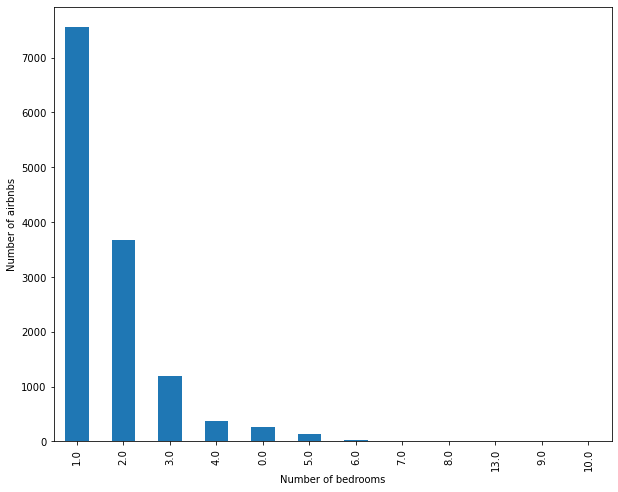

In [158]:
# We can see the number of bedrooms in the dataset and the mean is 1.58
plt.figure(figsize=(10,8))
value_counts = listings['bedrooms'].value_counts()
value_counts.plot.bar()

plt.xlabel('Number of bedrooms')
plt.ylabel('Number of airbnbs')
plt.show()


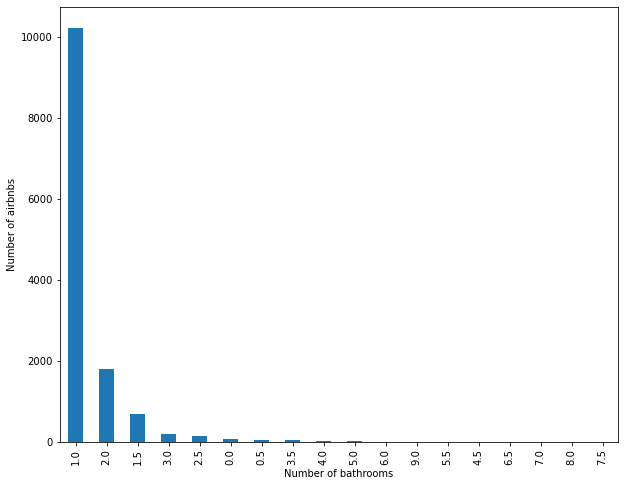

In [157]:
# We can see that mostly about 80% of all the airbnbs have 1 bathroom
plt.figure(figsize=(10,8))
bathrooms_value_counts = listings['bathrooms'].value_counts()
bathrooms_value_counts.plot.bar()
plt.xlabel('Number of bathrooms')
plt.ylabel('Number of airbnbs')
plt.show() 

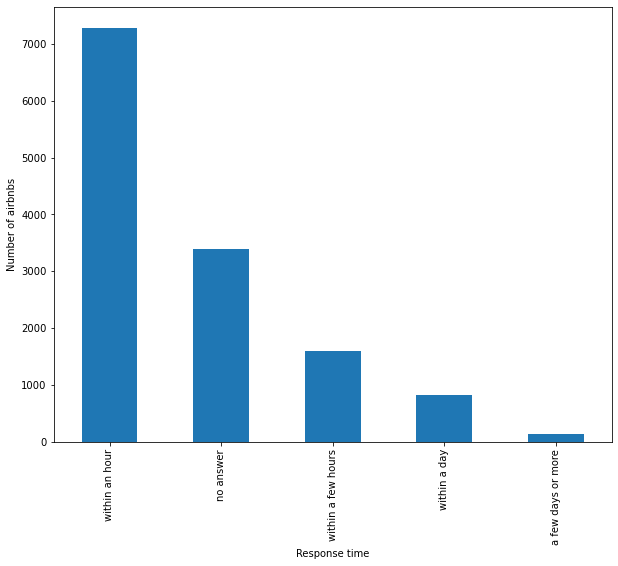

In [156]:
# We can see that most of the time the host replies withing an hour
plt.figure(figsize=(10,8))
response_time_value_counts = listings['host_response_time'].value_counts()
response_time_value_counts.plot.bar()
plt.xlabel('Response time')
plt.ylabel('Number of airbnbs')
plt.show() 

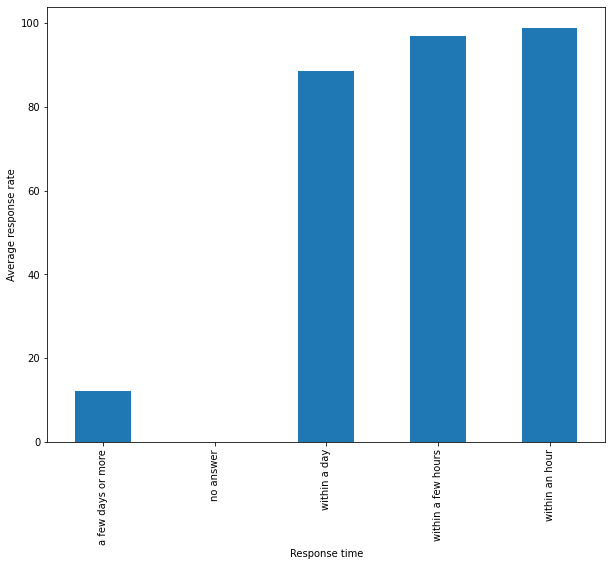

In [155]:
# However this is a more interesting graph which shows the average response for each response time category
plt.figure(figsize=(10,8))
response_rates = listings.groupby('host_response_time')['host_response_rate'].mean()
response_rates.plot.bar()
plt.xlabel('Response time')
plt.ylabel('Average response rate')
plt.show()


In [114]:
# We can find the distribution of prices
listings['price'].mean()

125.89731974329936

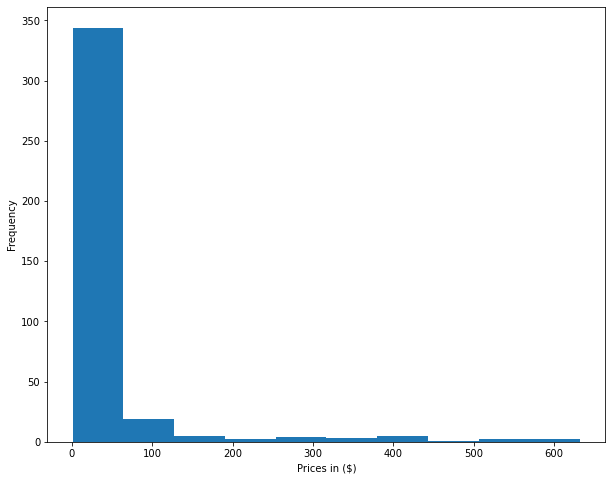

In [154]:
# Distribution of prices per night in the Airbnb dataset but the mean is $ 125.9
plt.figure(figsize=(10,8))
plt.hist(price, bins=10)
plt.xlabel("Prices in ($)")
plt.ylabel("Frequency")
plt.show()

### Relationship between price and reviews

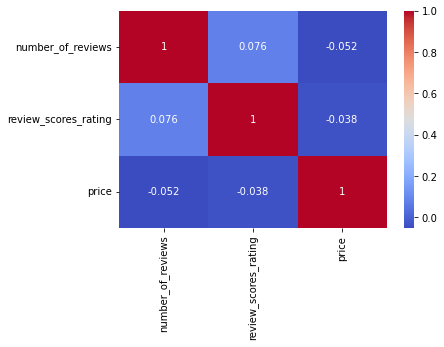

In [118]:
# This heatmap shows the correlation matrix showing the strength and direction of the correlation between each
# pair of variables
corr_matrix = listings[['number_of_reviews', 'review_scores_rating', 'price']].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.show()

### Relationship between property type and price

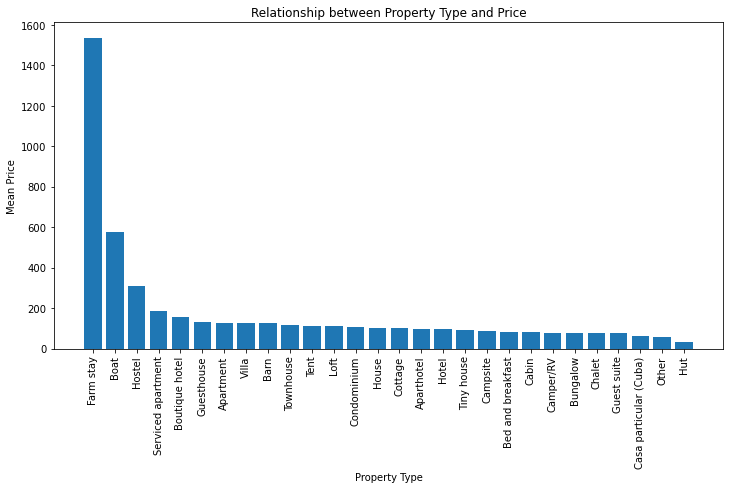

In [130]:
# Group the data by property type and calculate the mean price for each type
property_type_price = listings.groupby('property_type')['price'].mean().reset_index()

# Sort the values in descending order based on mean price
property_type_price = property_type_price.sort_values(by='price', ascending=False)

# Plot the mean price for each property type
plt.figure(figsize=(12,6))
plt.bar(property_type_price['property_type'], property_type_price['price'])
plt.xticks(rotation=90)
plt.xlabel('Property Type')
plt.ylabel('Mean Price')
plt.title('Relationship between Property Type and Price')
plt.show()

# We see the mean price and the different property types and can conclude than Farm stay has the highest mean price
# whil ea Hut offers the lowest mean price

### Relationship  between  neighbourhood and price

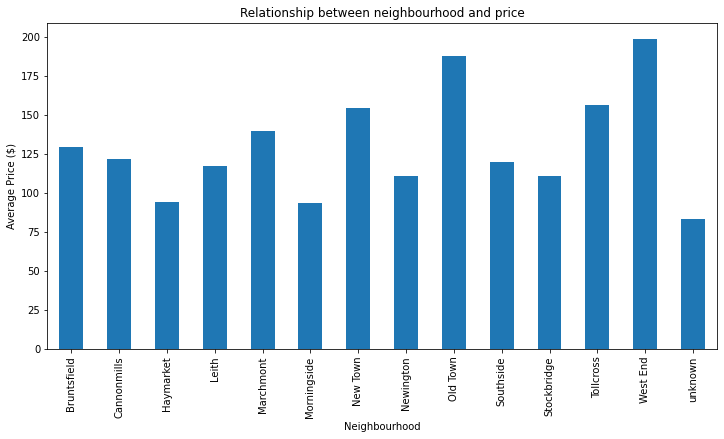

In [135]:
# Extract relevant columns
location_price_df = listings[['neighbourhood', 'price']]

# Group by neighbourhood and compute mean price
neighbourhood_price = location_price_df.groupby('neighbourhood')['price'].mean()

# Plot the average price by neighbourhood
neighbourhood_price.plot(kind='bar', figsize=(12,6))
plt.xlabel('Neighbourhood')
plt.ylabel('Average Price ($)')
plt.title('Relationship between neighbourhood and price')
plt.show()

# We can see which neighbourhood is the most expensive but they are pretty much evenly expensive

### Relationship between response rate vs review scores

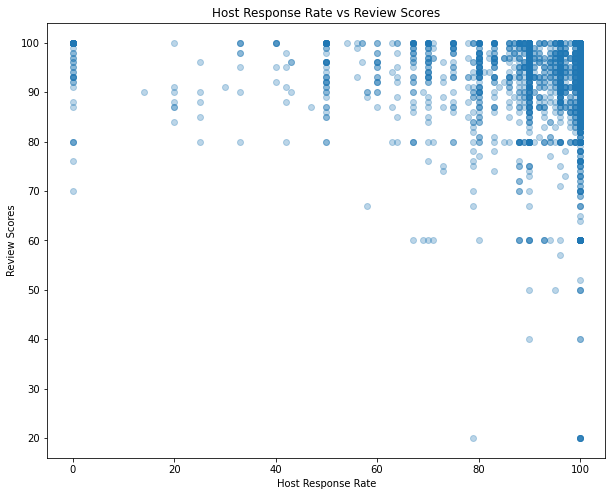

In [162]:
# Create a scatter plot of host response rate vs review scores
plt.figure(figsize=(10,8))
plt.scatter(listings['host_response_rate'], listings['review_scores_rating'], alpha=0.3)

# Set axis labels and title
plt.xlabel('Host Response Rate')
plt.ylabel('Review Scores')
plt.title('Host Response Rate vs Review Scores')

# Show the plot
plt.show()
# We can see that there is a positive relationship between the review scores and
# the host response rate as we see most of the plot circles in the top right corner

### Relationship between the availability of a listing and the property type

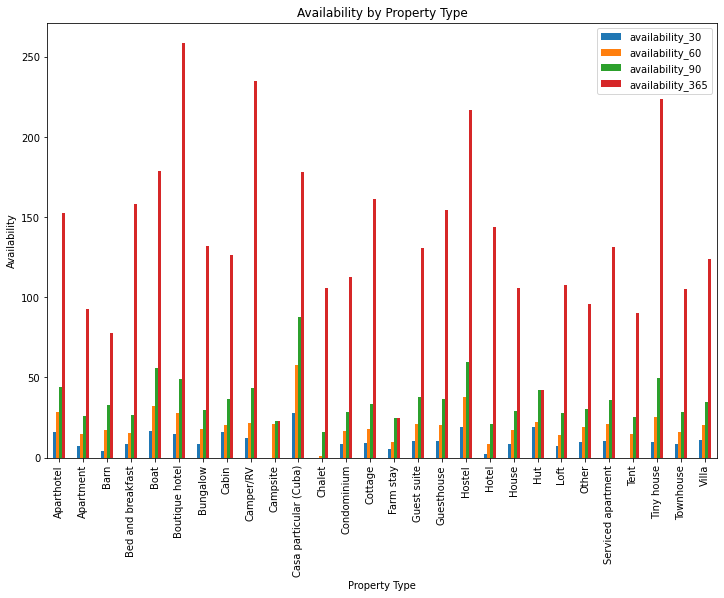

In [174]:
# Create a bar chart of average availability by property type
availability_by_property_type = listings.groupby('property_type')[['availability_30', 'availability_60', 'availability_90', 'availability_365']].mean()
availability_by_property_type.plot(kind='bar', figsize=(12, 8))

# Set axis labels and title
plt.xlabel('Property Type')
plt.ylabel('Availability')
plt.title('Availability by Property Type')

# Show the plot
plt.show()

# This code groups the "listings" dataframe by property type and calculates the mean 
# availability for each type over different periods (30 days, 60 days, 90 days, and 365 days).
# The mean availability for each property type is then plotted using a bar chart, with each
# bar representing a different property type and the height of the bar representing the mean
# availability for that type. The x-axis represents the different property types and the y-axis
# represents the mean availability.

In [178]:
listings.columns

Index(['id', 'name', 'host_id', 'host_since', 'host_location',
       'host_response_time', 'host_response_rate', 'host_is_superhost',
       'host_listings_count', 'host_total_listings_count', 'neighbourhood',
       'city', 'state', 'zipcode', 'market', 'property_type', 'room_type',
       'accommodates', 'bathrooms', 'bedrooms', 'beds', 'bed_type', 'price',
       'security_deposit', 'cleaning_fee', 'guests_included', 'extra_people',
       'minimum_nights', 'maximum_nights', 'minimum_minimum_nights',
       'maximum_minimum_nights', 'minimum_maximum_nights',
       'maximum_maximum_nights', 'minimum_nights_avg_ntm',
       'maximum_nights_avg_ntm', 'availability_30', 'availability_60',
       'availability_90', 'availability_365', 'number_of_reviews',
       'number_of_reviews_ltm', 'review_scores_rating',
       'review_scores_accuracy', 'review_scores_cleanliness',
       'review_scores_checkin', 'review_scores_communication',
       'review_scores_location', 'review_scores_value

In [184]:
# This code calculates the average price of listings for each host
price_cols = ['host_id', 'price']
avg_price_by_host = listings.groupby('host_id')['price'].mean().reset_index()
top_10_hosts = avg_price_by_host.sort_values(by='price', ascending=False).head(10)
print(top_10_hosts)

        host_id         price
7730  159226863  12345.000000
7471  144388294   7000.000000
8995  248633838   6875.733333
2135   19504588   6747.000000
5835   84715536   3500.000000
3919   41938554   3000.000000
8872  234993103   2510.600000
5905   86457709   2354.000000
5653   80447250   1654.476190
5141   68538373   1583.333333


In [193]:

# Select relevant columns for analysis
price_cols = ['host_total_listings_count', 'price']

# Calculate the average price of listings for each host total listings count
avg_price_by_total_listings = listings.groupby('host_total_listings_count')['price'].mean().reset_index()

# Show the results
print(avg_price_by_total_listings)

    host_total_listings_count        price
0                         0.0    82.833333
1                         1.0   102.291246
2                         2.0    92.440532
3                         3.0    94.717262
4                         4.0    99.762963
5                         5.0   127.029221
6                         6.0   124.522822
7                         7.0   158.719298
8                         8.0   139.421053
9                         9.0   162.313433
10                       10.0    98.559524
11                       11.0   416.211538
12                       12.0   126.793478
13                       13.0   123.777778
14                       14.0   106.469388
15                       15.0  1597.706667
16                       16.0   309.285714
17                       17.0   123.205882
18                       18.0   137.400000
19                       20.0    97.352941
20                       21.0   747.725490
21                       22.0   242.123596
22         

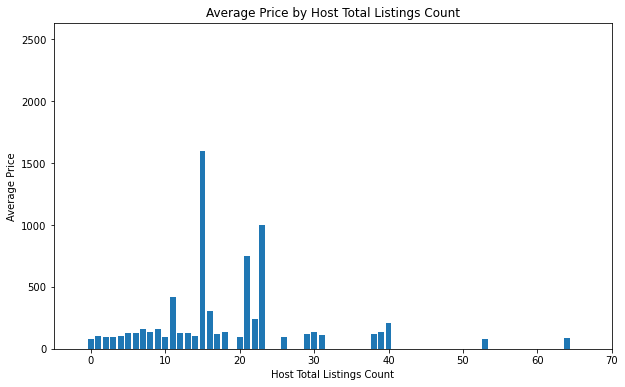

In [204]:
# Calculate the average price of listings for each host total listings count
avg_price_by_total_listings = listings.groupby('host_total_listings_count')['price'].mean().reset_index()

# Create a bar plot of the average price by host total listings count
fig, ax = plt.subplots(figsize=(10, 6))
ax.bar(avg_price_by_total_listings['host_total_listings_count'], avg_price_by_total_listings['price'])
ax.set_xlim(-5,70)

# Set axis labels and title
ax.set_xlabel('Host Total Listings Count')
ax.set_ylabel('Average Price')
ax.set_title('Average Price by Host Total Listings Count')

# Show the plot
plt.show()

# We can conclude that most hosts have around 15 properies for an average price of a little bit over $ 1,500. 
# There are some outliers above the 70 point but most of them are between 1 and 40 properties. 
# So having more properties also means that the higher the prices will be. Maybe those hosts have more expensive properties in general